<a href="https://colab.research.google.com/github/Parth-Kakdiya-13/TensorFlow/blob/main/Regression_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


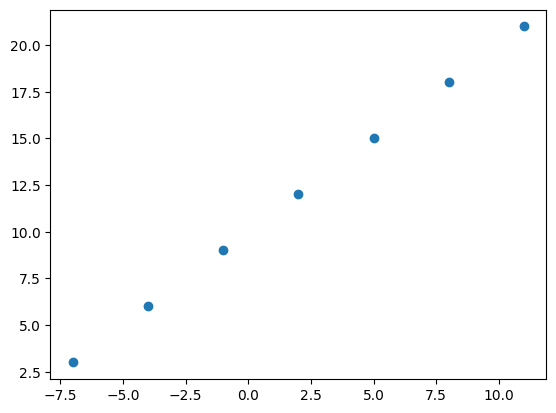

In [ ]:
# Create Data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# crate features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0])
# create labels
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0])
# visualize
plt.scatter(X,Y)

In [ ]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Input and output shape
# creating a demo for our housing price prediction
house_info = tf.constant(["bathroom,bathroom,garage"])
house_price = tf.constant([9322222])
house_info,house_price

(<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'bathroom,bathroom,garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9322222], dtype=int32)>)

In [ ]:
# convert array to tensors and change dtype with float 32
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X,Y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

***Steps in modelling with Tensorflow***


---


**=> Creating a model** - define the input and outout kayers, as well as the hidden layers of a deep learning model.

**=> Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optmizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the preference of our model).

**=> Fitting a model** - letting the model try to finding patterns between X & Y (features and labels).


---



In [ ]:
# set random seeds
tf.random.set_seed(42)
# create a model with sequencial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit the model
# Reshape X to be (number_of_samples, number_of_features)
# model.fit(X,Y,epochs=5) # this is not work
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

weights, bias = model.layers[0].get_weights()
print("Learned weight (slope):", weights[0][0])
print("Learned bias (intercept):", bias[0])


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - loss: 18.1761 - mae: 18.1761
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 17.9098 - mae: 17.9098
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 17.6435 - mae: 17.6435
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 17.3772 - mae: 17.3772
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 17.1114 - mae: 17.1114
Learned weight (slope): -1.4552008
Learned bias (intercept): 0.024285715


In [ ]:
# checkout X and Y
X,Y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

In [ ]:
# try and make predection
y_pred = model.predict(tf.expand_dims([17.0], axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


array([[-7.2912455]], dtype=float32)

In [ ]:
y_pred + 10

array([[2.7087545]], dtype=float32)

**Improving our model**
---
we can improve our model, by altering the steps we took to create a model

1. **create a model** - Here we might add more layers, increase number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layers
2. **compiling a model** - here we might change optimization function or perhaps the **lerning rate** of optimization function
3. **fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [ ]:
# lets rebuild our model

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step - loss: 11.2463 - mae: 11.2463
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.1963 - mae: 11.1963
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11.1463 - mae: 11.1463
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 11.0963 - mae: 11.0963
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 11.0463 - mae: 11.0463
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 10.9963 - mae: 10.9963
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 10.9463 - mae: 10.9463
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.8963 - mae: 10.8963
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - loss: 10.8463 - mae: 10.8463
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 10.7963 - mae: 10.7963
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 10.7463 - mae: 10.7463
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 10.6963 - mae: 10.6963
Epoch 13/100
1/1 ━

In [ ]:
# Let's see if our model prediction improved
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[32.274708]], dtype=float32)

**- change the learning rate (this is important hyper parameter of many different known networks)**

In [ ]:
# let's see if we can make another changes to improve our model

# 1. create the model (this time add extra hidden layer with 100 hidden unites)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

# 2 compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# 3 fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)
# model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.5476 - mae: 12.5476
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.1264 - mae: 12.1264
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.7047 - mae: 11.7047
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.2805 - mae: 11.2805
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.8524 - mae: 10.8524
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.4192 - mae: 10.4192
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.9792 - mae: 9.9792
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.5311 - mae: 9.5311
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.0733 - mae: 9.0733
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.6041 - mae: 8.6041
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.1218 - mae: 8.1218
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.6245 - mae: 7.6245
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
# let's remid ourselves of data
X,Y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

In [ ]:
# let's predict
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[26.943043]], dtype=float32)

**Evaluating a model**

In practice, a typcal workflow you will go through when building neural network is:

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...

# when it comes to evaluation... there are 3 words you should memorize:
# "vizualize","vizualize""vizualize"
Its good idea to vizualize:
* The data - what data we are working with? what does it looks like?
* The model itself - what does our model looks like?
* The training of a model - how does a model perform while it learns?
* The prediction of the model - how do the prediction of a model line up against the group truth(the original labels)?

In [ ]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

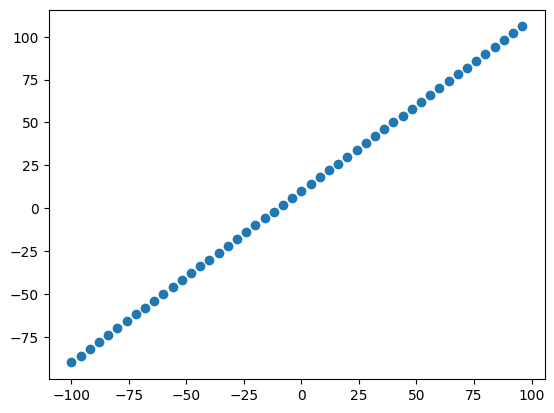

In [ ]:
# vizulize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### The 3 sets...

* **Training set** - the model learn from this data, which is typically 70-80% of the total data you hava available.
* **validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **test data** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.